In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.shape

(244, 7)

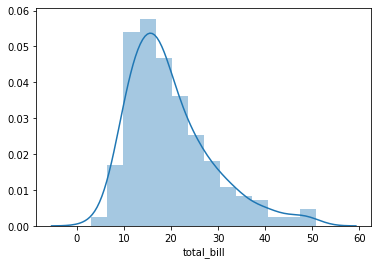

In [7]:
sns.distplot(tips['total_bill'])

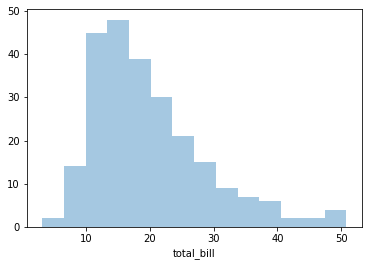

In [8]:
sns.distplot(tips['total_bill'], kde=False)

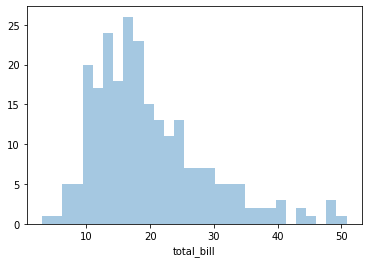

In [9]:
sns.distplot(tips['total_bill'], kde=False, bins=30)

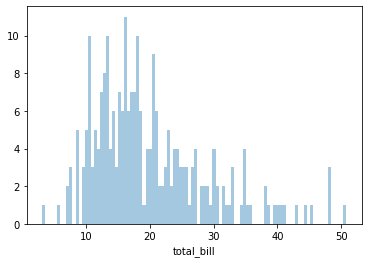

In [11]:
sns.distplot(tips['total_bill'], kde=False, bins=100)

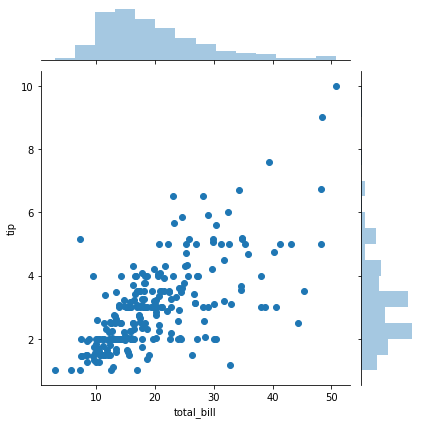

In [12]:
sns.jointplot(x='total_bill',y='tip',data=tips)

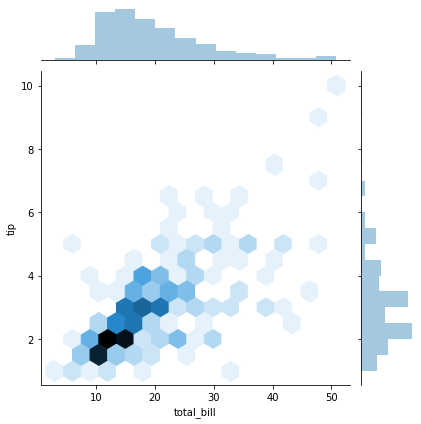

In [44]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='hex')

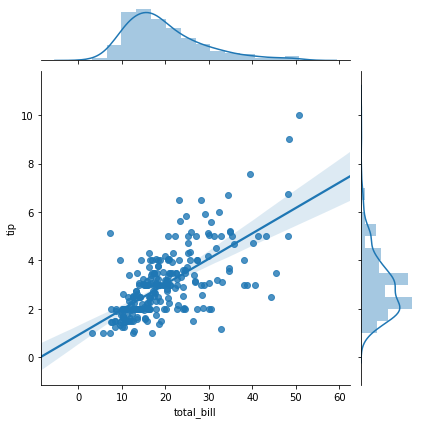

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='reg')

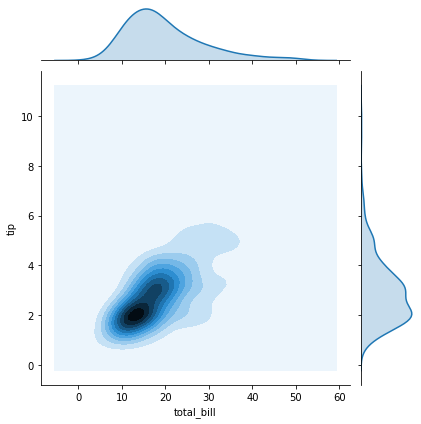

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips, kind='kde')

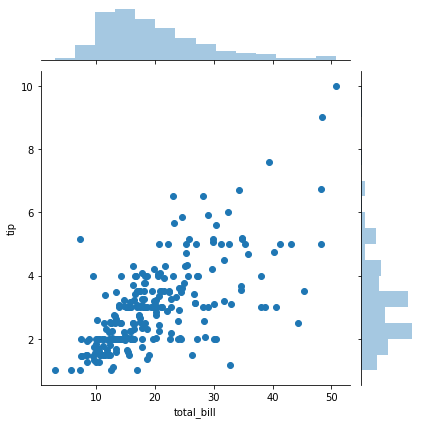

In [16]:
sns.jointplot(x='total_bill',y='tip',data=tips)

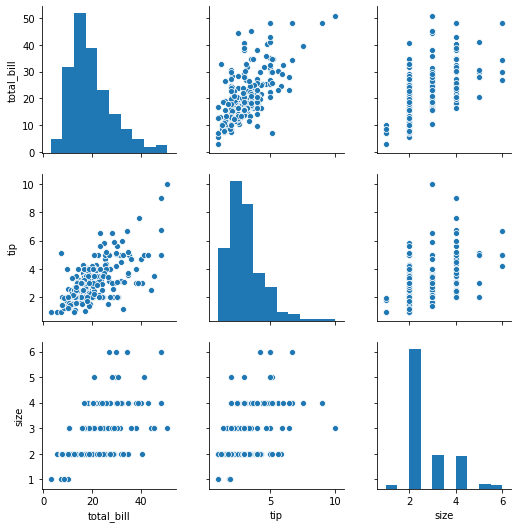

In [17]:
sns.pairplot(tips)

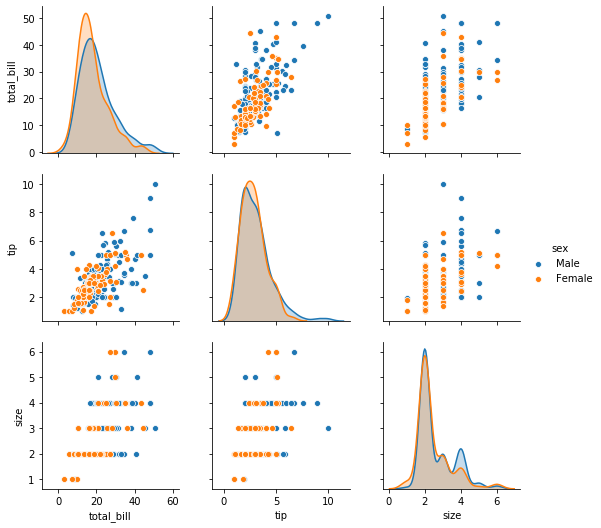

In [18]:
sns.pairplot(tips,hue='sex')

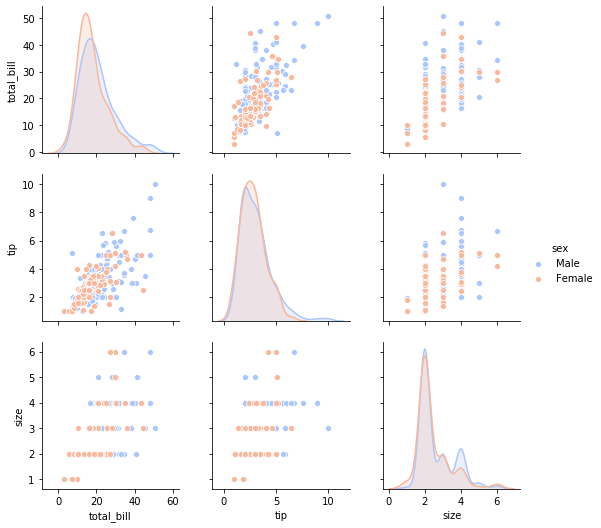

In [20]:
sns.pairplot(tips,hue='sex',palette='coolwarm')

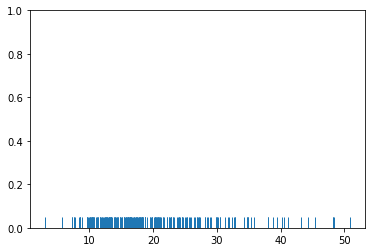

In [21]:
sns.rugplot(tips['total_bill'])

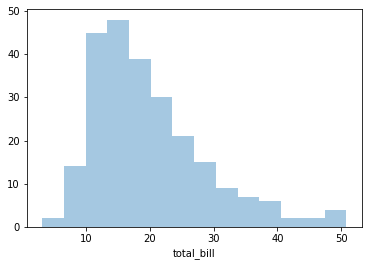

In [22]:
sns.distplot(tips['total_bill'], kde=False)

In [23]:
#kde = kernal density estimation plot 
#nd = Normal Distribution

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [27]:
dataset= np.random.randn(25)
dataset

array([-1.65147232, -0.00261642,  0.44527467, -0.79934367, -1.46783157,
       -0.2450551 , -1.96309284, -1.66344705, -0.61781809,  0.13189427,
        0.28342349,  0.72953307, -0.43731983, -0.71133855, -1.65615474,
        1.3885229 ,  1.60310036, -0.0643797 ,  0.83803715, -0.30241531,
       -0.8555524 ,  0.00791397, -1.23177167,  1.26744364,  0.53789672])

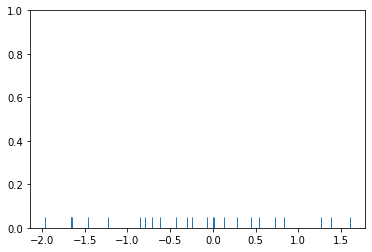

In [28]:
sns.rugplot(dataset)

In [30]:
x_min = dataset.min() - 2
x_min

-3.96309284483442

In [31]:
x_max = dataset.max() + 2
x_max

3.6031003603411156

In [32]:
x_axis = np.linspace(x_min,x_max,100)

In [33]:
x_axis

array([-3.96309284, -3.88666665, -3.81024046, -3.73381426, -3.65738807,
       -3.58096187, -3.50453568, -3.42810949, -3.35168329, -3.2752571 ,
       -3.1988309 , -3.12240471, -3.04597852, -2.96955232, -2.89312613,
       -2.81669993, -2.74027374, -2.66384755, -2.58742135, -2.51099516,
       -2.43456897, -2.35814277, -2.28171658, -2.20529038, -2.12886419,
       -2.052438  , -1.9760118 , -1.89958561, -1.82315941, -1.74673322,
       -1.67030703, -1.59388083, -1.51745464, -1.44102844, -1.36460225,
       -1.28817606, -1.21174986, -1.13532367, -1.05889747, -0.98247128,
       -0.90604509, -0.82961889, -0.7531927 , -0.6767665 , -0.60034031,
       -0.52391412, -0.44748792, -0.37106173, -0.29463553, -0.21820934,
       -0.14178315, -0.06535695,  0.01106924,  0.08749544,  0.16392163,
        0.24034782,  0.31677402,  0.39320021,  0.46962641,  0.5460526 ,
        0.62247879,  0.69890499,  0.77533118,  0.85175738,  0.92818357,
        1.00460976,  1.08103596,  1.15746215,  1.23388835,  1.31

In [37]:
bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2
bandwidth

0.55234385194889

(0, 1)

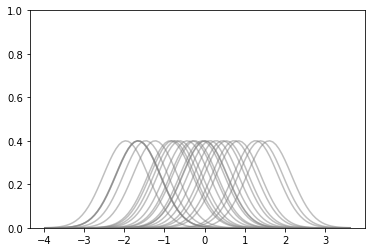

In [39]:
kernel_list=[]

for x in dataset:
    kernel = stats.norm(x,bandwidth ).pdf(x_axis)
    kernel_list.append(kernel)
    
    kernel = kernel/kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)
plt.ylim(0,1)

Text(0.5, 0.98, 'Sum of the Basis Functions')

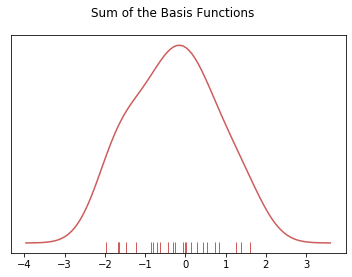

In [40]:
#To get the kde plot we can sum these basis functions.
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis,sum_of_kde, color='indianred')

sns.rugplot(dataset, c='indianred')

plt.yticks([])

plt.suptitle("Sum of the Basis Functions")

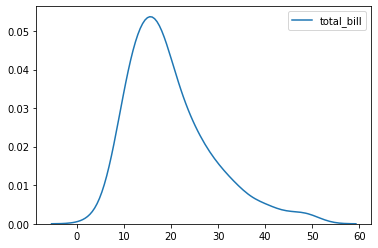

In [42]:
sns.kdeplot(tips['total_bill'])